# To join or not to join
* Merging datasets

**Instructions:** This is an individual assignment, but you may discuss your code with your classmates.

**Problem type key and definition:**
* _Exercises_ are autograded on GitHub classroom
* _Problems_ are manually graded and often open ended without a single correct answer.
* _Stop and think_ prompts are not graded, and are provided to guide you.

Please see the README for instructions on how to submit and obtain the lab.

In [2]:
%load_ext autoreload
%autoreload 2


# Put all your solutions into Lab1_helper.py as this script which is autograded
import Lab4_helper 

from pathlib import Path
home = str(Path.home()) # all other paths are relative to this path. 
# This is not relevant to most people because I recommended you use my server, but
# change home to where you are storing everything. Again. Not recommended.

In [7]:
import pandas as pd
import glob
dfs = {}
for file in glob.glob(f'{home}/data-301-student/data/pesticide/*.csv'):
    name = file.split("/")[-1].replace(".csv","")
    dfs[name] = pd.read_csv(file)
    print(name)
    display(dfs[name].head())

anotate_codes


Annotate Code                              Annotated Information
0             Q          Residue at below quantifiable level (BQL)
1            QV  Residue at <BQL> with presumptive violation - ...
2             V  Residue with a presumptive violation - No Tole...
3             X  Residue with a presumptive violation - Exceeds...

commodity_codes


Commodity Code           Commodity Name  # of Samples Analyzed
0             AP                   Apples                    177
1             BB  Blueberries, Cultivated                    688
2             BN                  Bananas                    179
3             BR                 Broccoli                    712
4             BZ      Blueberries, Frozen                     19

tolerance_codes


Pesticide Code Commodity Code EPA Tolerance Value pp_ Note       Comment
0            001             AP                0.03   M   AL  Action Level
1            001             BB                0.05   M   AL  Action Level
2            001             BN                0.02   M   AL  Action Level
3            001             BR                0.03   M   AL  Action Level
4            001             BZ                0.05   M   AL  Action Level

country_codes


Country Code Country Name
0          150    Argentina
1          190      Belgium
2          260       Canada
3          275        Chile
4          280        China

quantitate_codes


Quantitate Code          Quantitation Method
0               E                     Estimate
1               P  Marginal Performing Analyte

pest_codes


Pest Code    Pesticide Name Test Class  # of Analysis Results
0       001            Aldrin          A                  10150
1       002         Allethrin          O                   6718
2       011            Captan          A                   2903
3       014  Chlordanes Total          A                   1389
4       015   Chlorobenzilate          A                   1770

disttype_codes


DistType Code Collection Facility Type
0             D      Distribution Center
1             H                Wholesale
2             L     Wholesale and Retail
3             R                   Retail
4             T          Terminal Market

origin_codes


Origin Code Origin of Sample
0            1  Domestic (U.S.)
1            2         Imported
2            3   Unknown origin

test_class_codes


Test Class Code Test (Compound) Class
0               A           Halogenated
1               B         Benzimidazole
2               C      Organophosphorus
3               D            Avermectin
4               E             Carbamate

mean_codes


Mean Code                      Mean Result Finding
0         A     Detect: Avg of Original & Re-extract
1        ND    Non-Detect: Validated, well-recovered
2        NP  Non-Detect: Marginal Performing Analyte
3         O        Detect: Original Extraction Value
4         R    Detect - Re-extraction Analysis Value

state_codes


State Code       State
0         AK      Alaska
1         AL     Alabama
2         AR    Arkansas
3         AZ     Arizona
4         CA  California

concen_codes


Concen/LOD Unit Code Concen/LOD Unit Description
0                    B     Parts-per-Billion (ppb)
1                    M     Parts-per-Million (ppm)
2                    T    Parts-per-Trillion (ppt)

claim_codes


Claim Code Commodity Marketing Claim
0         NC                  No Claim
1         OT                     Other
2         PO                   Organic
3         PP            Pesticide Free

lab_codes


Lab Code                                   Lab Agency Name    Lab City/State
0      CA1       California Department of Food & Agriculture    Sacramento, CA
1      FL1   Florida Dept of Agriculture & Consumer Services   Tallahassee, FL
2      MI1  Michigan Dept of Agriculture & Rural Development  East Lansing, MI
3      NY1    New York Department of Agriculture and Markets        Albany, NY
4      OH1                    Ohio Department of Agriculture  Reynoldsburg, OH

commod_type_codes


Commod Type Code      Commodity Type
0               BR                Bran
1               CA              Canned
2               CO  Liquid Concentrate
3               FR               Fresh
4               FZ              Frozen

confmethod_codes


ConfMethod Code              Confirmation Method
0              GT     GC/MS/MS - triple quadropole
1              LU     LC-MS/MS - triple quadrapole
2              MO  Quant. & Confirm. by GC/MS only

determin_codes


Determin Code                               Determinative Method
0              7  GC/MS - Gas Chrom w/Mass Spec - single quadrupole
1             35                       GC/MS/MS - triple quadrupole
2             52  LC/MS/MS - Liquid Chrom w/ Tandem Mass Spec - ...
3             64                                    Second LC/MS/MS
4             67                                     Third LC/MS/MS

extract_codes


Extract Code                     Extraction Method
0           805          MDA Modified QuEChERS Method
1           818   NSL Animal Tissue Extraction Method
2           823  WSDA Animal Tissue Extraction Method
3           998         OTHER Single-Analysis Methods

Here is a nice way to view the columns in alpabetical order:

In [3]:
pd.Series(df_airbnb.columns).sort_values()

12                 accommodates
40                    amenities
25             availability_365
13                    bathrooms
39                     bed_type
14                     bedrooms
15                         beds
29        cancellation_f0_m1_s2
20                 cleaning_fee
2                   description
22                 extra_people
21              guests_included
5                    host_about
36       host_identity_verified
7           host_listings_count
32          host_listings_total
3                     host_name
6            host_response_rate
8     host_total_listings_count
0                            id
28                 instant_book
35            is_location_exact
10                     latitude
11                    longitude
24               maximum_nights
23               minimum_nights
18                monthly_price
1                          name
26            number_of_reviews
16                        price
37                property_type
31      

## Interpretation and bias

**Problem 1:** Visualize the distribution of ``review_scores_rating`` using a boxplot. This is our dependent variable, and it is the average customer rating of the Airbnb listing, on a scale of 0-100. You'll need to use the altair package like we did in lecture. Here is some code to get you started. This code is not meant to run without additional modifications.
```python
alt.Chart(df_airbnb)
```
and
```python
properties(width=200)
```

In [4]:
import altair as alt
# Your solution here

alt.Chart(...)

One of the things that stands out to me is it might be difficult to find a single model that performs well on this entire range of scores. For this lab, let's limit ourselves to properties that are rated greater than 85 on this 100 point scale. This redefines are problem to predicting among properties with a rating of greater than 85, can we predict a more exact rating and determine what is driving this rating.

In [5]:
print("Number of observations before:",len(df_airbnb))
df_airbnb = df_airbnb[df_airbnb['review_scores_rating']>85].copy()
print("Number of observations after:",len(df_airbnb))

Number of observations before: 3816
Number of observations after: 2915


I am also going to mean center these ratings, so that a 0 rating represents our average score. This will aid in interpretation later.

In [6]:
df_airbnb['review_scores_rating'] = df_airbnb['review_scores_rating'] - df_airbnb['review_scores_rating'].mean()

<AxesSubplot:ylabel='Frequency'>

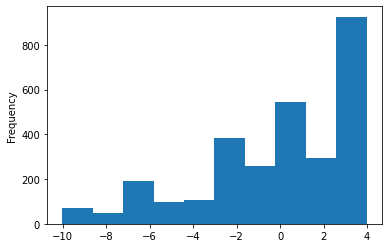

In [7]:
df_airbnb['review_scores_rating'].plot.hist()

Let's take a look at the non-numeric columns and see which ones might be categories (i.e., those with a limited number of values).

In [8]:
object_columns = list(df_airbnb.select_dtypes(include=['object']))
df_airbnb[object_columns].nunique()

name             2900
description      2866
host_name        1224
host_about       1705
zipcode            28
property_type      16
room_type           3
bed_type            5
amenities        2537
dtype: int64

There are some obvious categorical variables which include zipcode, room_type, property_type, and bed_type. There are some that are obviously not categorical variables such as name, description, host_name, and host_about. The column amenities is most likely another text description, but let's see with a little digging:

In [9]:
df_airbnb['amenities'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                     18
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron}                                                   10
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                              

The individual entries are strings, but we want to convert this to a set for processing.

In [10]:
df_airbnb['amenities'].loc[0]

'{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}'

In [11]:
df_airbnb['amenities'].loc[1]

'{TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}'

The code below is beyond the scope of what we can do from scratch yet, but it deals with this nested array that is embedded inside a string. Don't worry. We'll have you writing this type of thing by the end of the class.

In [12]:
df_airbnb['amenities_processed'] = df_airbnb['amenities'].apply(lambda e: set([v.replace('"',"").replace("{","").replace("}","").strip() for v in e.split(",")]).difference(set([''])))

Once we fix that column, we can now convert this to binary labels. And there is a sklearn function for that of course.

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
new_df = pd.DataFrame(mlb.fit_transform(df_airbnb['amenities_processed']),index=df_airbnb.index,columns=mlb.classes_)
new_df

24-Hour Check-in  Air Conditioning  Breakfast  Buzzer/Wireless Intercom  \
0                    0                 1          0                         0   
1                    0                 0          0                         1   
2                    0                 1          0                         0   
4                    0                 0          0                         0   
5                    0                 0          0                         0   
...                ...               ...        ...                       ...   
3806                 0                 1          0                         0   
3808                 1                 0          0                         0   
3809                 0                 1          0                         0   
3810                 1                 0          0                         0   
3812                 1                 0          0                         0   

      Cable TV  Carbon Monoxide Detector  Cat(s)  Dog(s)  Doorman  Dryer  ...  \
0            1                         0       0       0        0      1  ...   
1            0                         1       0       0        0      1  ...   
2            1                         1       1       1        0      1  ...   
4            1                         1       0       0        0      0  ...   
5            0                         0       0       0        0      0  ...   
...        ...                       ...     ...     ...      ...    ...  ...   
3806         1                         1       0       0        0      1  ...   
3808         1                         1       1       0        0      1  ...   
3809         1                         0       0       0        0      1  ...   
3810         0                         1       0       0        0      1  ...   
3812         1                         0       0       0        0      0  ...   

      Pool  Safety Card  Shampoo  Smoke Detector  Smoking Allowed  \
0        0            0        0               0                0   
1        0            1        0               1                0   
2        0            0        1               1                0   
4        0            0        1               1                0   
5        0            0        1               1                0   
...    ...          ...      ...             ...              ...   
3806     0            0        1               1                0   
3808     0            1        1               1                0   
3809     0            1        1               1                0   
3810     0            0        1               1                0   
3812     0            0        1               1                0   

      Suitable for Events  TV  Washer  Wheelchair Accessible  \
0                       0   1       1                      0   
1                       0   1       1                      0   
2                       0   1       1                      0   
4                       0   1       0                      0   
5                       0   0       0                      0   
...                   ...  ..     ...                    ...   
3806                    0   1       1                      0   
3808                    0   1       1                      0   
3809                    0   1       1                      0   
3810                    0   0       1                      0   
3812                    0   1       0                      0   

      Wireless Internet  
0                     1  
1                     1  
2                     1  
4                     1  
5                     1  
...                 ...  
3806                  1  
3808                  1  
3809                  1  
3810                  1  
3812                  1  

[2915 rows x 40 columns]

How do we perform a similar operation with numeric values? For example, we might have numeric variables that are categorical variables. 

In [14]:
number_columns = list(df_airbnb.select_dtypes(include=['number']))
for c in number_columns:
    print(c)
    display(df_airbnb[c].value_counts())

id


8525825    1
1593939    1
3732103    1
3402376    1
8643209    1
          ..
4388148    1
9174327    1
5195064    1
5078129    1
7178239    1
Name: id, Length: 2915, dtype: int64

years_host


5     722
6     645
4     632
7     424
8     306
9     129
10     55
11      2
Name: years_host, dtype: int64

host_response_rate


1.00    1975
0.90     130
0.80      63
0.99      55
0.88      44
0.94      40
0.50      31
0.67      28
0.98      27
0.89      26
0.75      26
0.86      25
0.70      18
0.97      18
0.60      17
0.83      16
0.93      16
0.92      12
0.96      12
0.63       9
0.95       7
0.33       7
0.78       6
0.91       5
0.40       3
0.76       3
0.43       3
0.64       2
0.71       2
0.25       2
0.87       2
0.17       2
0.82       1
0.58       1
0.65       1
0.30       1
0.38       1
0.56       1
0.31       1
0.81       1
0.53       1
Name: host_response_rate, dtype: int64

host_listings_count


1.0      1631
2.0       507
3.0       217
4.0       111
5.0        81
48.0       41
34.0       39
169.0      37
6.0        37
9.0        27
36.0       24
37.0       21
8.0        20
21.0       20
10.0       20
7.0        19
18.0       18
13.0       12
11.0       12
12.0        7
17.0        5
163.0       4
15.0        3
84.0        1
354.0       1
Name: host_listings_count, dtype: int64

host_total_listings_count


1.0      1631
2.0       507
3.0       217
4.0       111
5.0        81
48.0       41
34.0       39
169.0      37
6.0        37
9.0        27
36.0       24
37.0       21
8.0        20
21.0       20
10.0       20
7.0        19
18.0       18
13.0       12
11.0       12
12.0        7
17.0        5
163.0       4
15.0        3
84.0        1
354.0       1
Name: host_total_listings_count, dtype: int64

latitude


47.650928    1
47.672272    1
47.656127    1
47.579706    1
47.685087    1
            ..
47.617632    1
47.625787    1
47.704399    1
47.588696    1
47.685114    1
Name: latitude, Length: 2915, dtype: int64

longitude


-122.301934    2
-122.344504    2
-122.339242    2
-122.298503    2
-122.303323    2
              ..
-122.295912    1
-122.315888    1
-122.309003    1
-122.320400    1
-122.384932    1
Name: longitude, Length: 2910, dtype: int64

accommodates


2     1266
4      584
3      322
6      269
1      159
5      142
8       83
7       39
10      18
12      14
9       10
16       4
14       3
11       1
15       1
Name: accommodates, dtype: int64

bathrooms


1.0    2217
2.0     274
1.5     192
2.5      93
3.0      48
3.5      46
0.5      17
4.0       6
0.0       4
4.5       3
5.0       2
8.0       2
Name: bathrooms, dtype: int64

bedrooms


1.0    1864
2.0     488
0.0     275
3.0     216
4.0      43
5.0      16
6.0       6
7.0       1
Name: bedrooms, dtype: int64

beds


1.0     1688
2.0      686
3.0      337
4.0      113
5.0       50
6.0       17
7.0       14
8.0        4
9.0        3
10.0       2
15.0       1
Name: beds, dtype: int64

price


150    118
100    104
75      90
95      85
65      84
      ... 
700      1
680      1
498      1
490      1
999      1
Name: price, Length: 253, dtype: int64

weekly_price


500.0     75
600.0     70
450.0     55
1000.0    54
800.0     49
          ..
255.0      1
1485.0     1
208.0      1
524.0      1
1159.0     1
Name: weekly_price, Length: 370, dtype: int64

monthly_price


2500.0    54
2000.0    42
3000.0    41
3500.0    38
1800.0    36
          ..
3264.0     1
2990.0     1
690.0      1
3120.0     1
1395.0     1
Name: monthly_price, Length: 328, dtype: int64

security_deposit


100.0     282
200.0     228
300.0     191
250.0     191
500.0     183
150.0     151
350.0      54
95.0       51
400.0      40
1000.0     19
750.0      10
175.0       8
125.0       7
800.0       6
2500.0      5
1500.0      5
99.0        5
700.0       5
450.0       4
600.0       4
995.0       3
295.0       3
550.0       2
199.0       2
1200.0      2
120.0       2
180.0       1
650.0       1
780.0       1
115.0       1
499.0       1
195.0       1
399.0       1
140.0       1
109.0       1
134.0       1
449.0       1
5000.0      1
220.0       1
360.0       1
225.0       1
2000.0      1
Name: security_deposit, dtype: int64

cleaning_fee


50.0     244
25.0     198
60.0     145
20.0     142
10.0     132
        ... 
185.0      1
42.0       1
119.0      1
131.0      1
143.0      1
Name: cleaning_fee, Length: 110, dtype: int64

guests_included


1     1622
2      852
4      182
0       79
3       68
6       58
5       20
8       18
7       11
10       2
12       1
9        1
13       1
Name: guests_included, dtype: int64

extra_people


0      1456
10      297
20      267
25      266
15      244
50       76
30       73
5        52
40       34
35       28
75       13
7        12
100      11
45        8
8         7
60        7
29        7
17        6
12        5
19        4
9         4
18        4
14        4
6         4
28        3
300       2
22        2
80        2
49        2
55        2
33        1
71        1
36        1
13        1
27        1
16        1
250       1
200       1
68        1
26        1
48        1
44        1
175       1
Name: extra_people, dtype: int64

minimum_nights


2       1203
1       1139
3        370
4         80
5         45
7         33
6         13
14        10
20         6
30         6
10         3
13         1
29         1
21         1
1000       1
26         1
12         1
31         1
Name: minimum_nights, dtype: int64

maximum_nights


1125    1743
30       158
365      135
14       109
7         91
        ... 
500        1
400        1
260        1
352        1
1825       1
Name: maximum_nights, Length: 67, dtype: int64

availability_365


365    437
364     66
0       63
89      50
361     45
      ... 
198      1
281      1
285      1
194      1
4        1
Name: availability_365, Length: 354, dtype: int64

number_of_reviews


1      217
2      196
4      138
3      137
5      102
      ... 
270      1
278      1
294      1
320      1
353      1
Name: number_of_reviews, Length: 192, dtype: int64

review_scores_rating


 3.981475     780
 1.981475     292
-0.018525     278
 0.981475     265
-1.018525     260
-2.018525     198
-3.018525     184
 2.981475     146
-6.018525     138
-4.018525     105
-5.018525      97
-9.018525      55
-7.018525      53
-8.018525      47
-10.018525     17
Name: review_scores_rating, dtype: int64

instant_book


0    2413
1     502
Name: instant_book, dtype: int64

cancellation_f0_m1_s2


2    1156
1    1054
0     705
Name: cancellation_f0_m1_s2, dtype: int64

require_guest_pic


0    2637
1     278
Name: require_guest_pic, dtype: int64

require_guest_phone


0    2584
1     331
Name: require_guest_phone, dtype: int64

host_listings_total


1     1847
2      473
3      220
4       96
5       61
6       54
31      24
37      21
21      20
18      17
9       17
7       15
11      12
8       10
34       9
10       7
12       7
15       5
Name: host_listings_total, dtype: int64

reviews_per_month


1.00    58
2.00    43
0.23    20
0.36    19
0.71    17
        ..
6.83     1
6.28     1
3.65     1
3.59     1
4.88     1
Name: reviews_per_month, Length: 652, dtype: int64

superhost


0.0    2169
1.0     746
Name: superhost, dtype: int64

is_location_exact


1    2656
0     259
Name: is_location_exact, dtype: int64

host_identity_verified


1.0    2416
0.0     499
Name: host_identity_verified, dtype: int64

We now know which encoder or scaler we need to run on which columns. This is summarized below:
* OneHotEncoder: ``zipcode``, ``room_type``, ``property_type``, ``bed_type``, ``instant_book``, and ``superhost``.
* MultiLabelBinarizer: ``amenities_processed``
* StandardScaler: ``years_host``, ``host_response_rate``, ``host_listings_count``, ``host_total_listings_count``, ``accommodates``, ``bathrooms``, ``bedrooms``, ``beds``, ``price``, ``weekly_price``, ``monthly_price``, ``security_deposit``, ``cleaning_fee``, ``guests_included``, ``extra_people``, ``minimum_nights``, ``maximum_nights``, ``number_of_reviews``,  and ``reviews_per_month``.

One problem though. MultiLabelBinarizer is not compatable with ColumnTransformer. This is mainly because MultiLabelBinarizer works on a single column when we need it work on multiple columns. The great news is that because sklearn is object oriented we can make our own transformer!

**Exercise 1:** Insert the following code into the correct location and complete the missing portions.

Code segment A:
```python
result = list()
for i in range(self.n_columns):
    result.append(self.mlbs[i].transform(X.iloc[:,i]))

result = np.concatenate(result, axis=1)
return result
```

Code segment B:
```python
for i in range(X.shape[1]): # X can be of multiple columns
    mlb = MultiLabelBinarizer()
    mlb.fit(???)
    self.mlbs.append(mlb)
    self.classes_.append(mlb.classes_)
    self.n_columns += 1
return self
```



In [15]:
mhe = Lab3_helper.MultiHotEncoder()
mhe.fit(df_airbnb[['amenities_processed']])
encoded = pd.DataFrame(mhe.transform(df_airbnb[['amenities_processed']]),columns=mhe.categories_)
encoded

24-Hour Check-in Air Conditioning Breakfast Buzzer/Wireless Intercom  \
0                   0                1         0                        0   
1                   0                0         0                        1   
2                   0                1         0                        0   
3                   0                0         0                        0   
4                   0                0         0                        0   
...               ...              ...       ...                      ...   
2910                0                1         0                        0   
2911                1                0         0                        0   
2912                0                1         0                        0   
2913                1                0         0                        0   
2914                1                0         0                        0   

     Cable TV Carbon Monoxide Detector Cat(s) Dog(s) Doorman Dryer  ... Pool  \
0           1                        0      0      0       0     1  ...    0   
1           0                        1      0      0       0     1  ...    0   
2           1                        1      1      1       0     1  ...    0   
3           1                        1      0      0       0     0  ...    0   
4           0                        0      0      0       0     0  ...    0   
...       ...                      ...    ...    ...     ...   ...  ...  ...   
2910        1                        1      0      0       0     1  ...    0   
2911        1                        1      1      0       0     1  ...    0   
2912        1                        0      0      0       0     1  ...    0   
2913        0                        1      0      0       0     1  ...    0   
2914        1                        0      0      0       0     0  ...    0   

     Safety Card Shampoo Smoke Detector Smoking Allowed Suitable for Events  \
0              0       0              0               0                   0   
1              1       0              1               0                   0   
2              0       1              1               0                   0   
3              0       1              1               0                   0   
4              0       1              1               0                   0   
...          ...     ...            ...             ...                 ...   
2910           0       1              1               0                   0   
2911           1       1              1               0                   0   
2912           1       1              1               0                   0   
2913           0       1              1               0                   0   
2914           0       1              1               0                   0   

     TV Washer Wheelchair Accessible Wireless Internet  
0     1      1                     0                 1  
1     1      1                     0                 1  
2     1      1                     0                 1  
3     1      0                     0                 1  
4     0      0                     0                 1  
...  ..    ...                   ...               ...  
2910  1      1                     0                 1  
2911  1      1                     0                 1  
2912  1      1                     0                 1  
2913  0      1                     0                 1  
2914  1      0                     0                 1  

[2915 rows x 40 columns]

**Exercise 2:** Fill in the correct objects for our column transformer inside Lab3_helper.exercise_2.

In [16]:
one_hot_columns = ['zipcode', 'room_type', 'property_type', 'bed_type', 'instant_book', 'superhost']
multi_label_columns = ['amenities_processed']
standard_scaler_columns = ['years_host', 'host_response_rate', 'host_listings_count', 
                           'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 
                           'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 
                           'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 
                           'maximum_nights', 'number_of_reviews',  'reviews_per_month']
ct = Lab3_helper.exercise_2(one_hot_columns,multi_label_columns,standard_scaler_columns)
index_values = df_airbnb[standard_scaler_columns].dropna().index
X = df_airbnb.loc[index_values].drop('review_scores_rating',axis=1)
y = df_airbnb.loc[index_values]['review_scores_rating']

encoded = ct.fit_transform(X)
encoded

array([[ 0.0669752 ,  0.19955586, -0.0592542 , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.0669752 ,  0.19955586, -0.0592542 , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.0669752 ,  0.38045467, -0.46453691, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.0669752 , -6.40325065, -0.46453691, ...,  1.        ,
         0.        ,  1.        ],
       [-0.59838502,  0.38045467, -0.46453691, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.39769566,  0.38045467, -0.46453691, ...,  1.        ,
         0.        ,  1.        ]])

This output while hopefully useful to predict the review score is not easy to interpret. _Some_ sklearn transformers implement ``get_feature_names()``, but our StandardScaler and MultiOneHot classes do not. We need to fix this problem.

**Exercise 3:** Complete the class that I have provided called ``StandardScalerImproved`` such that it implements ``get_feature_names()``.

In [17]:
scaler = Lab3_helper.StandardScalerImproved()
scaler.fit(df_airbnb[standard_scaler_columns])
encoded = pd.DataFrame(scaler.transform(df_airbnb[standard_scaler_columns]),columns=scaler.get_feature_names())
encoded

years_host  host_response_rate  host_listings_count  \
0       1.369148            0.026629            -0.153912   
1       0.073978            0.214171            -0.017709   
2      -0.573607           -2.692719            -0.199313   
3       1.369148            0.401712            -0.199313   
4       2.016734                 NaN            -0.244714   
...          ...                 ...                  ...   
2910    0.073978            0.401712            -0.199313   
2911    1.369148            0.401712            -0.244714   
2912   -0.573607            0.401712            -0.244714   
2913    0.721563            0.401712            -0.153912   
2914   -1.221192            0.401712            -0.244714   

      host_total_listings_count  accommodates  bathrooms  bedrooms      beds  \
0                     -0.153912      0.318527  -0.436113 -0.346003 -0.635221   
1                     -0.017709      0.318527  -0.436113 -0.346003 -0.635221   
2                     -0.199313      3.858587   5.407861  4.260507  4.527422   
3                     -0.199313      1.329973   1.233594  1.957252  1.085660   
4                     -0.244714     -0.692918  -0.436113 -0.346003 -0.635221   
...                         ...           ...        ...       ...       ...   
2910                  -0.199313      1.329973   1.233594  1.957252  1.085660   
2911                  -0.244714      0.824250  -0.436113  0.805625  1.085660   
2912                  -0.244714     -0.187195  -0.436113 -0.346003 -0.635221   
2913                  -0.153912      0.318527  -0.436113 -0.346003  0.225220   
2914                  -0.244714      0.318527  -0.436113 -0.346003  0.225220   

         price  weekly_price  monthly_price  security_deposit  cleaning_fee  \
0    -0.465218           NaN            NaN               NaN           NaN   
1     0.258356      0.398955       0.202082         -0.686026     -0.423764   
2     9.442179           NaN            NaN          2.745935      4.999186   
3     3.597928           NaN            NaN          1.601948      1.349123   
4    -0.075601      0.019459            NaN               NaN     -0.423764   
...        ...           ...            ...               ...           ...   
2910  0.536653           NaN            NaN          0.839290      0.723398   
2911  0.302883      0.626653       1.634879         -0.495362      0.514823   
2912 -0.687856           NaN            NaN               NaN     -0.840914   
2913 -0.353899     -0.360037      -0.256414          0.839290           NaN   
2914 -0.532010           NaN            NaN          0.839290     -0.215189   

      guests_included  extra_people  minimum_nights  maximum_nights  \
0            0.224282     -0.353175       -0.077342       -0.197838   
1           -0.545779     -0.633511       -0.023612       -0.341831   
2            6.384774      0.768169        0.083849       -0.373248   
3            3.304528      0.207497       -0.077342        0.200109   
4           -0.545779      1.048505       -0.077342       -0.385815   
...               ...           ...             ...             ...   
2910         1.764405      1.048505        0.030118        0.200109   
2911         1.764405      2.169849       -0.023612       -0.381626   
2912        -0.545779     -0.633511       -0.077342        0.200109   
2913         0.224282     -0.184974        0.030118       -0.197838   
2914         0.994344      0.768169       -0.023612       -0.373772   

      number_of_reviews  reviews_per_month  
0              4.420602           1.034160  
1              0.369153          -0.375731  
2             -0.199038          -0.555370  
3              0.245633          -0.696903  
4             -0.273150           0.152297  
...                 ...                ...  
2910           0.023297          -0.555370  
2911          -0.569598          -0.332182  
2912          -0.643710          -0.838437  
2913           1.110271           1.001498  
2914          -

**Exercise 4:** Our other class, MultiHotEncoder, has the same problem, but it's a little trickier because inside that object is a list of MultiLabelBinarizers. This is a relatively minor adjustments, and it will be our next exercise to implement get_feature_names() for MultiHotEncoder.

In [18]:
mhei = Lab3_helper.MultiHotEncoderImproved()
mhei.fit(df_airbnb[multi_label_columns])
encoded = pd.DataFrame(mhei.transform(df_airbnb[multi_label_columns]),columns=mhei.get_feature_names())
encoded

24-Hour Check-in  Air Conditioning  Breakfast  Buzzer/Wireless Intercom  \
0                    0                 1          0                         0   
1                    0                 0          0                         1   
2                    0                 1          0                         0   
3                    0                 0          0                         0   
4                    0                 0          0                         0   
...                ...               ...        ...                       ...   
2910                 0                 1          0                         0   
2911                 1                 0          0                         0   
2912                 0                 1          0                         0   
2913                 1                 0          0                         0   
2914                 1                 0          0                         0   

      Cable TV  Carbon Monoxide Detector  Cat(s)  Dog(s)  Doorman  Dryer  ...  \
0            1                         0       0       0        0      1  ...   
1            0                         1       0       0        0      1  ...   
2            1                         1       1       1        0      1  ...   
3            1                         1       0       0        0      0  ...   
4            0                         0       0       0        0      0  ...   
...        ...                       ...     ...     ...      ...    ...  ...   
2910         1                         1       0       0        0      1  ...   
2911         1                         1       1       0        0      1  ...   
2912         1                         0       0       0        0      1  ...   
2913         0                         1       0       0        0      1  ...   
2914         1                         0       0       0        0      0  ...   

      Pool  Safety Card  Shampoo  Smoke Detector  Smoking Allowed  \
0        0            0        0               0                0   
1        0            1        0               1                0   
2        0            0        1               1                0   
3        0            0        1               1                0   
4        0            0        1               1                0   
...    ...          ...      ...             ...              ...   
2910     0            0        1               1                0   
2911     0            1        1               1                0   
2912     0            1        1               1                0   
2913     0            0        1               1                0   
2914     0            0        1               1                0   

      Suitable for Events  TV  Washer  Wheelchair Accessible  \
0                       0   1       1                      0   
1                       0   1       1                      0   
2                       0   1       1                      0   
3                       0   1       0                      0   
4                       0   0       0                      0   
...                   ...  ..     ...                    ...   
2910                    0   1       1                      0   
2911                    0   1       1                      0   
2912                    0   1       1                      0   
2913                    0   0       1                      0   
2914                    0   1       0                      0   

      Wireless Internet  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
2910                  1  
2911                  1  
2912                  1  
2913                  1  
2914                  1  

[2915 rows x 40 columns]

**Exercise 5:** Let's put our new classes to work, and make sure everything works. Fill in the correct objects for our column transformer inside Lab3_helper.exercise_5.

In [19]:
one_hot_columns = ['zipcode', 'room_type', 'property_type', 'bed_type', 'instant_book', 'superhost']
multi_label_columns = ['amenities_processed']
standard_scaler_columns = ['years_host', 'host_response_rate', 'host_listings_count', 
                           'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 
                           'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 
                           'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 
                           'maximum_nights', 'number_of_reviews',  'reviews_per_month']
ct = Lab3_helper.exercise_5(one_hot_columns,multi_label_columns,standard_scaler_columns)
index_values = df_airbnb[standard_scaler_columns].dropna().index
X = df_airbnb.loc[index_values].drop('review_scores_rating',axis=1)
y = df_airbnb.loc[index_values]['review_scores_rating']

encoded = ct.fit_transform(X)
feature_names = ct.get_feature_names()
feature_names

['standardscalerimproved__years_host',
 'standardscalerimproved__host_response_rate',
 'standardscalerimproved__host_listings_count',
 'standardscalerimproved__host_total_listings_count',
 'standardscalerimproved__accommodates',
 'standardscalerimproved__bathrooms',
 'standardscalerimproved__bedrooms',
 'standardscalerimproved__beds',
 'standardscalerimproved__price',
 'standardscalerimproved__weekly_price',
 'standardscalerimproved__monthly_price',
 'standardscalerimproved__security_deposit',
 'standardscalerimproved__cleaning_fee',
 'standardscalerimproved__guests_included',
 'standardscalerimproved__extra_people',
 'standardscalerimproved__minimum_nights',
 'standardscalerimproved__maximum_nights',
 'standardscalerimproved__number_of_reviews',
 'standardscalerimproved__reviews_per_month',
 'onehotencoder__x0_98101',
 'onehotencoder__x0_98102',
 'onehotencoder__x0_98103',
 'onehotencoder__x0_98104',
 'onehotencoder__x0_98105',
 'onehotencoder__x0_98106',
 'onehotencoder__x0_98107',
 

We now have everything prepared to ``fit`` our models. We will do this using both linear regression and k-nearest neighbor. We will compare the performance of these models first using all the training data, and then we will use cross-validation to select the ``k`` value hyper-parameter.

**Exercise 6:** Construct a linear regression that predicts ``review_scores_rating`` using the column transformer we constructed above.

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score

one_hot_columns = ['zipcode', 'room_type', 'property_type', 'bed_type', 'instant_book', 'superhost']
multi_label_columns = ['amenities_processed']
standard_scaler_columns = ['years_host', 'host_response_rate', 'host_listings_count', 
                           'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 
                           'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 
                           'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 
                           'maximum_nights', 'number_of_reviews',  'reviews_per_month']
ct = Lab3_helper.exercise_5(one_hot_columns,multi_label_columns,standard_scaler_columns)

# Remove samples that could cause a problem because of missing values
index_values = df_airbnb[standard_scaler_columns].dropna().index
X = df_airbnb.loc[index_values].drop('review_scores_rating',axis=1)
y = df_airbnb.loc[index_values]['review_scores_rating'] # What we are trying to predict

model = Lab3_helper.exercise_6(ct,X,y)
y_ = model.predict(X)
mean_absolute_error(y,y_),r2_score(y,y_)

(2.4315638931729033, 0.29085884683942165)

**Exercise 7:** Construct a k-nearest neighbor regressor with ``k=10`` that predicts ``review_scores_rating`` using the column transformer we constructed above.

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

one_hot_columns = ['zipcode', 'room_type', 'property_type', 'bed_type', 'instant_book', 'superhost']
multi_label_columns = ['amenities_processed']
standard_scaler_columns = ['years_host', 'host_response_rate', 'host_listings_count', 
                           'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 
                           'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 
                           'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 
                           'maximum_nights', 'number_of_reviews',  'reviews_per_month']
ct = Lab3_helper.exercise_5(one_hot_columns,multi_label_columns,standard_scaler_columns)

# Remove samples that could cause a problem because of missing values
index_values = df_airbnb[standard_scaler_columns].dropna().index
X = df_airbnb.loc[index_values].drop('review_scores_rating',axis=1)
y = df_airbnb.loc[index_values]['review_scores_rating'] # What we are trying to predict

model = Lab3_helper.exercise_7(ct,X,y)
y_ = model.predict(X)
mean_absolute_error(y,y_),r2_score(y,y_)

(2.61006600660066, 0.21903591240899467)

**Problem 2:** Compare the results from our work in exercise 6 and 7. Is there a clear "winner" in terms of performance between our k-nearest neighbors approach and the linear regression. If not, which metric indicates that the linear model is better?

**Your answer here**

**Problem 3:** For your linear regression model, create a bar chart showing the top 20 coefficients sorted by the |coefficients|. See if you can get something similar to my graph. I used ``barh`` to get the horizontal bar graph.

HINTS: You might/probably will want to use the following commands:

In [22]:
model.steps[-1]

('kneighborsregressor', KNeighborsRegressor(n_neighbors=10))

In [23]:
model.steps[-2]

('columntransformer',
 ColumnTransformer(transformers=[('standardscalerimproved',
                                  StandardScalerImproved(),
                                  ['years_host', 'host_response_rate',
                                   'host_listings_count',
                                   'host_total_listings_count', 'accommodates',
                                   'bathrooms', 'bedrooms', 'beds', 'price',
                                   'weekly_price', 'monthly_price',
                                   'security_deposit', 'cleaning_fee',
                                   'guests_included', 'extra_people',
                                   'minimum_nights', 'maximum_nights',
                                   'number_of_reviews', 'reviews_per_month']),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['zipcode', 'room_type', 'property_type',
            

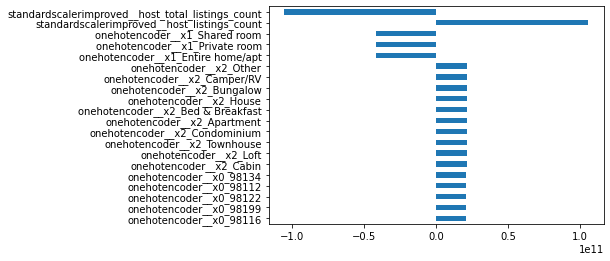

In [24]:
model = Lab3_helper.exercise_6(ct,X,y)
# Your solution here

So what is listing count? According to some digging, it is not suprisingly the total number of listings for a host. There is a high coefficient in the linear model for this feature when predicting a rating for a property. It seems like hosts with a high total listing count result in higher reviews. This could be because they are better hosts and thus because they have more properties, but it also seems there might be algorithm bias. Hosts with few listings may not get as much attention in search results from Airbnb, and therefore, they are not able to rebound after a few bad reviews. Interpretation is one of the most difficult things in data science, and thus, arguably a more important area to study than other data science topics. In many instances, interpretation requires significant domain expertise, and understanding of the methodology. 

**Problem 4:** Complete the same analysis and produce a similar plot, but remove the columns related to host listing count. I removed them in the variables below for you.

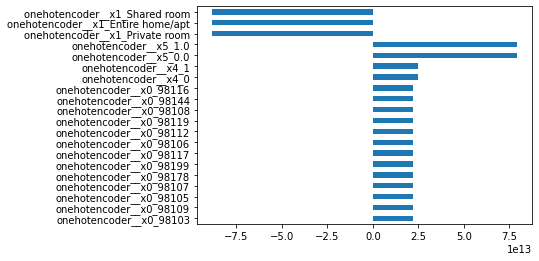

In [25]:
from sklearn.metrics import mean_absolute_error, r2_score

one_hot_columns = ['zipcode', 'room_type', 'property_type', 'bed_type', 'instant_book', 'superhost']
multi_label_columns = ['amenities_processed']
standard_scaler_columns = ['years_host', 'host_response_rate','accommodates', 'bathrooms', 'bedrooms', 
                           'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 
                           'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 
                           'maximum_nights', 'number_of_reviews',  'reviews_per_month']
ct = Lab3_helper.exercise_5(one_hot_columns,multi_label_columns,standard_scaler_columns)

# Remove samples that could cause a problem because of missing values
index_values = df_airbnb[standard_scaler_columns].dropna().index
X = df_airbnb.loc[index_values].drop('review_scores_rating',axis=1)
y = df_airbnb.loc[index_values]['review_scores_rating'] # What we are trying to predict

model = Lab3_helper.exercise_6(ct,X,y)
# Your solution here

I think we are now getting somewhere! But how, for example, do we determine what x4 and x5 are? They are from our one host columns and they start at x0. So x4 is ``instant_book``, and what do we know :), instant book is important for predicting customer satisfaction. Now that is some insight that a company can use. Good job data scientist! The type of room is also very important (private/entire/shared). The identifier x5 is ``superhost``. 

## Hyperparameter tuning

We want to compare linear regression to k-nearest neighbor, but we arbitrarily chose ``k``. We know how to perform a grid search from the chapter, so let's get to it!

**Exercise 8:** Run grid search using sklearn and find the best parameters for n_neighbors. More details are in the helper file. 

In [26]:
from sklearn.metrics import mean_absolute_error, r2_score

one_hot_columns = ['zipcode', 'room_type', 'property_type', 'bed_type', 'instant_book', 'superhost']
multi_label_columns = ['amenities_processed']
standard_scaler_columns = ['years_host', 'host_response_rate','accommodates', 'bathrooms', 'bedrooms', 
                           'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 
                           'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 
                           'maximum_nights', 'number_of_reviews',  'reviews_per_month']
ct = Lab3_helper.exercise_5(one_hot_columns,multi_label_columns,standard_scaler_columns)

index_values = df_airbnb[standard_scaler_columns].dropna().index
X = df_airbnb.loc[index_values].drop('review_scores_rating',axis=1)
y = df_airbnb.loc[index_values]['review_scores_rating'] # What we are trying to predict
pipeline = Lab3_helper.exercise_7(ct,X,y)

best_params = Lab3_helper.exercise_8(pipeline,X,y)
best_params

{'kneighborsregressor__n_neighbors': 38}

So are we ready to compare k-nearest neighbors to linear regression? ... Well not so fast. We have now run out of data. Whenever, you compare two models you need to treat them both the same. We want to compare the best k-nearest neighbor to linear regression... This is often where things get a little off the rails for some data scientists. What we need to do is be careful about how we are going to nest our validation and hyperparameter tuning. We want to estimate the test set error, so we want to run:
```python
cross_val_score(best_knn_pipeline,...) vs cross_val_score(linear_pipeline,...)
```
The linear pipeline is relatively easy since we are not performing any hyperparameter tuning. The best_knn_pipeline is not necessarily going to be the same for each fold of the cross-validation because the training data is not the same. Luckily for us, sklearn can handle all of this for us if we nest things properly. The key difference is that instead of calling ``.fit`` on GridSearchCV directly, we are going to pass this object directly to cross_val_score. i.e.,
```python
cross_val_score(grid_search_cv_object,...)
```
Let's give it a try in the next exercise!

**Exercise 9:** Compare a hypertuned k-nearest neighbor regressor to a linear regressor using cross_val_score and GridSearchCV. See the helper file for more details.

In [30]:
# Remove samples that could cause a problem because of missing values
index_values = df_airbnb[standard_scaler_columns].dropna().index
X = df_airbnb.loc[index_values].drop('review_scores_rating',axis=1)
y = df_airbnb.loc[index_values]['review_scores_rating'] # What we are trying to predict
r2_knn,r2_linear = Lab3_helper.exercise_9(X,y)
r2_knn,r2_linear

(0.03842251228310371, -1.6779573409863183e+23)

**Problem 5:** What do these numbers mean? Answer the following. Are they any good? Are they better than guessing the mean rating for all listings? What does the negative number mean?

**Your answer here**

In [31]:
# Good job!
# Don't forget to push with ./submit.sh